In [2]:
# Citation of the following great resource
# https://www.statology.org/repeated-measures-anova-python/
# https://jbhender.github.io/Stats506/F18/GP/Group16.html
# https://www.statsmodels.org/devel/mixed_linear.html
# Author: Li Zhou, 09242020

In [3]:
#quick summary:
#For AnovaRM interpretations:
# the pharmacology affected GFP signal, lead to statistically significant differences in dosages (F(3, 9) = 15.5122, p = 0.0007)
# the pharmacology did not significant  affected mcherry signal in dosages (F(3, 9) = 0.4240, p = 0.7405)

#For Linear Mixed models interpretations:
#GFP beta coef: -2.01, 95%CI[-2.95,-1.07]
#mcherry beta coef: 0.08, 95%CI[-1.43, 1.59]

In [4]:
import numpy as np
import pandas as pd
import sys
import statsmodels
import sklearn
import scipy
print('python version:',sys.version)
print("pandas version:",pd.__version__)
print("numpy version:",np.__version__)
print('statsmodels:',statsmodels.__version__)
print('sklearn:',sklearn.__version__)
print('scipy:',scipy.__version__)
# python version: 3.8.3 | packaged by conda-forge | (default, Jun  1 2020, 16:59:10) [MSC v.1916 64 bit (AMD64)]
# pandas version: 1.0.5
# numpy version: 1.18.5
# statsmodels: 0.11.1
# sklearn: 0.23.1
# scipy: 1.3.2

python version: 3.8.3 | packaged by conda-forge | (default, Jun  1 2020, 16:59:10) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.0.5
numpy version: 1.18.5
statsmodels: 0.11.1
sklearn: 0.23.1
scipy: 1.3.2


In [5]:
from sklearn import preprocessing

In [6]:
#import the data
df_GFP = pd.read_csv('stats_norm_TCB2_rabies_pharmacology_03_27_2020.csv')
# df_GFP['drug_scaled'] = preprocessing.scale(df_GFP.drug.values)

df_GFP.head()

,patient,drug,response
0,311GW22,Control1,0.803689
1,311GW22,Control2,1.196311
2,311GW22,TCB_0.1,1.482685
3,311GW22,TCB_1,2.254695
4,311GW22,TCB_10,1.454476


In [7]:
# Test if the sample differs from a normal distribution / Gaussian.
from scipy import stats
x = df_GFP['response']
k2, p = stats.normaltest(x)
alpha = 0.05
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: samples comes from a normal distribution /Gaussian. 
    print("The null hypothesis can be rejected")
    print('Probably NOT Gaussian')
else:
    print("The null hypothesis cannot be rejected")
    print('Probably Gaussian or normal distribution')

p = 0.352262
The null hypothesis cannot be rejected
Probably Gaussian or normal distribution


In [ ]:
#perform the repeated measures ANOVA

In [8]:
from statsmodels.stats.anova import AnovaRM
#perform the repeated measures ANOVA
print('For GFP:')
print(AnovaRM(data=df_GFP, depvar='response',aggregate_func='mean', subject='patient', within=['drug']).fit())
print('_*'*20)
print('_*'*20)


For GFP:
              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
drug  2.5598 5.0000 15.0000 0.0725

_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*
_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*


In [28]:
# Linear Mixed Effects Models in R and Python


In [109]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#fit the model
mixed = smf.mixedlm("response ~ drug", df_GFP, groups='patient',re_formula="~drug") #
mixed_fit = mixed.fit()
#print the summary
# print(mixed_fit.summary())
print('the residual probably Gaussian distribution if P is large:',stats.shapiro(mixed_fit.resid)[1])
print('\np value:',mixed_fit.pvalues)
mixed_fit.summary()

C:\Users\zhouli\Anaconda3\envs\scanpy_sfn-workshop\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\zhouli\Anaconda3\envs\scanpy_sfn-workshop\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\zhouli\Anaconda3\envs\scanpy_sfn-workshop\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\zhouli\Anaconda3\envs\scanpy_sfn-workshop\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


the residual probably Gaussian distribution if P is large: 0.7207344174385071

p value: Intercept                                      5.422128e-14
drug[T.Control2]                               2.214103e-01
drug[T.Serotonin_10]                           5.674053e-02
drug[T.TCB_0.1]                                4.505326e-02
drug[T.TCB_1]                                  1.982040e-06
drug[T.TCB_10]                                 3.750588e-01
patient Var                                    8.333288e-01
patient x drug[T.Control2] Cov                 8.615665e-01
drug[T.Control2] Var                           8.571811e-01
patient x drug[T.Serotonin_10] Cov                      NaN
drug[T.Control2] x drug[T.Serotonin_10] Cov    8.376363e-01
drug[T.Serotonin_10] Var                                NaN
patient x drug[T.TCB_0.1] Cov                  9.849230e-01
drug[T.Control2] x drug[T.TCB_0.1] Cov         9.642738e-01
drug[T.Serotonin_10] x drug[T.TCB_0.1] Cov     8.854787e-01
drug[T.TCB_0

C:\Users\zhouli\Anaconda3\envs\scanpy_sfn-workshop\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\zhouli\Anaconda3\envs\scanpy_sfn-workshop\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2118: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\zhouli\Anaconda3\envs\scanpy_sfn-workshop\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2130: ConvergenceWarning: Gradient optimization failed, |grad| = 3.186523
  warnings.warn(msg, ConvergenceWarning)
C:\Users\zhouli\Anaconda3\envs\scanpy_sfn-workshop\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\zhouli\Anaconda3\envs\sca

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Mixed Linear Model Regression Results
=====================================================================================
Model:                       MixedLM           Dependent Variable:           response
No. Observations:            24                Method:                       REML    
No. Groups:                  4                 Scale:                        0.0476  
Min. group size:             6                 Log-Likelihood:               -10.9066
Max. group size:             6                 Converged:                    No      
Mean group size:             6.0                                                     
-------------------------------------------------------------------------------------
                                            Coef.  Std.Err.   z   P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------
Intercept                                    0.895    0.119 7.521 0.000  0.662  1.128
drug[T.Control2]                             0.210    0.172 1.223 0.221 -0.126  0.546
drug[T.Serotonin_10]                         0.498    0.262 1.905 0.057 -0.014  1.011
drug[T.TCB_0.1]                              0.698    0.348 2.004 0.045  0.015  1.381
drug[T.TCB_1]                                0.959    0.202 4.755 0.000  0.564  1.355
drug[T.TCB_10]                               0.168    0.189 0.887 0.375 -0.203  0.538
patient Var                                  0.009    0.196                          
patient x drug[T.Control2] Cov               0.011    0.289                          
drug[T.Control2] Var                         0.022    0.572                          
patient x drug[T.Serotonin_10] Cov          -0.004                                   
drug[T.Control2] x drug[T.Serotonin_10] Cov -0.019    0.429                          
drug[T.Serotonin_10] Var                     0.178                                   
patient x drug[T.TCB_0.1] Cov                0.009    2.216                          
drug[T.Control2] x drug[T.TCB_0.1] Cov       0.027    2.725                          
drug[T.Serotonin_10] x drug[T.TCB_0.1] Cov  -0.154    4.896                          
drug[T.TCB_0.1] Var                          0.390    8.975                          
patient x drug[T.TCB_1] Cov                  0.006    2.117                          
drug[T.Control2] x drug[T.TCB_1] Cov         0.009    2.584                          
drug[T.Serotonin_10] x drug[T.TCB_1] Cov     0.022    4.550                          
drug[T.TCB_0.1] x drug[T.TCB_1] Cov         -0.105    3.749                          
drug[T.TCB_1] Var                            0.068    3.884                          
patient x drug[T.TCB_10] Cov                -0.004    0.269                          
drug[T.Control2] x drug[T.TCB_10] Cov       -0.005    0.446                          
drug[T.Serotonin_10] x drug[T.TCB_10] Cov    0.015    0.729                          
drug[T.TCB_0.1] x drug[T.TCB_10] Cov         0.034    1.784                          
drug[T.TCB_1] x drug[T.TCB_10] Cov          -0.015    1.564                          
drug[T.TCB_10] Var                           0.047    0.642                          
=====================================================================================

"""

In [ ]:
# TCB_1, beta coef: 0.959, 95%CI[0.564,1.355],p = 1.98E-6

In [11]:
from statsmodels.formula.api import ols

# res = ols("np.log(Days+1) ~ C(Weight) + C(Duration)", data).fit()
res = ols("response ~ drug", df_GFP).fit()
pw = res.t_test_pairwise("drug")
# pw.result_frame.head()

In [12]:
#ccorretion for control 1
from statsmodels.stats.multitest import multipletests
pvals = pw.result_frame['P>|t|'].values[0:5]
print(pw.result_frame['P>|t|'].index[0:5])
multipletests(pvals, alpha=0.05, method='sidak', is_sorted=False, returnsorted=False)#holm-sidak

Index(['Control2-Control1', 'Sero_10-Control1', 'TCB_0.1-Control1',
       'TCB_1-Control1', 'TCB_10-Control1'],
      dtype='object')


(array([False, False, False,  True, False]),
 array([0.97094258, 0.48841494, 0.1720671 , 0.03089357, 0.98918117]),
 0.010206218313011495,
 0.01)

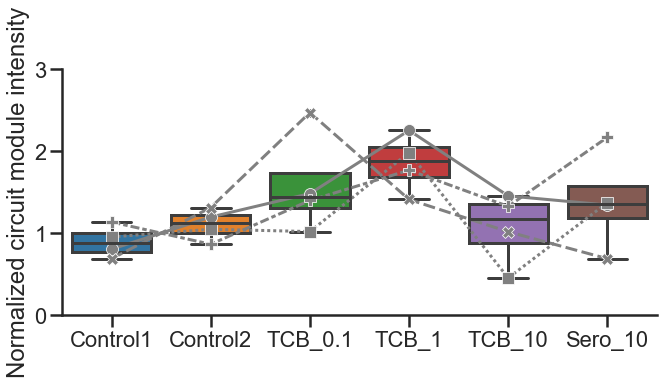

In [14]:
#plotting the figure
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('stats_norm_TCB2_rabies_pharmacology_03_27_2020.csv')#,index_col=0
df.head(1)
# sns.set(font_scale=2)
sns.set_style("white",{'ytick.left':True,'xtick.bottom': True})
sns.set_context("poster") #paper, notebook, talk, and poster
g=sns.catplot(data=df,x='drug',y='response',kind='box',height=5,aspect=2);
g=sns.lineplot(data=df, x='drug',y='response',
               style = 'patient',sort=False,legend=False,markers=True, dashes=True,
               color = 'grey',sizes=1)#hue='patient',
# g=sns.swarmplot(data=df,x='drug',y='response',linewidth=1,color='white',edgecolor='black',size=7)
g.set(ylim=[0,3],xlabel='',ylabel='Normalized circuit module intensity')

plt.savefig("TCB2.dosage09242020dpi110.png",dpi=110,bbox_inches='tight')